In [1]:
import numpy as np

In [2]:
#Financial Assets and Their Pricing Processes

#In this notebook, I shall define financial assets and discuss how one can model their pricing processes.
#I shall understand a 'financial asset' as instruments that have a fixed price Today, but a variable price Tomorrow.
#That variable price Tomorrow depends on the economy's state. Here, I define my toy economy as having two states: A Bull and a Bear market.
#A financial asset's pricing process maps the economy's state Tomorrow onto the asset's price Tomorrow.


#My toy economy economy has two financial assets and they have the following pricing processes:
#The first asset is a riskless bond:
B = (10, np.array((11, 11))) #the riskless bond's pricing process
#The second element in my list details how the bond's price depends on the economy's state tomorrow.
#However, both states have the same price, so there is no risk to a bond. It provides a guaranteed rate of return.

#The second asset is a risky stock: 
S = (10, np.array((20, 5))) #the risky stock's pricing process
#The stock's price depends on the economy's future state. 
# It is therefore a risky asset because there is some chance that it is an unprofitable investment.


M0 = np.array((B[0], S[0])) #the vector that describes the assets' value today
print(M0)

M1 = np.array((B[1], S[1])).T #the vector that describes those assets' value tomorrow
print(M1)

R = M1/M0 - 1 #The vector that describes assets' returns
print(R)

P = np.array((0.5, 0.5)) #This vector defines the probability measure


print(np.dot(P,R)) #the assets expected returns

s = 0.55

phi = (1-s, s) #the vector describing the bond and stock portfolio
print(phi)





[10 10]
[[11 20]
 [11  5]]
[[ 0.1  1. ]
 [ 0.1 -0.5]]
[0.1  0.25]
(0.44999999999999996, 0.55)
0.18250000000000005
0.41250000000000003


In [7]:
#I can now reduce a portfolio to its first and second movements, that is to its 
mu = np.dot(phi, np.dot(P, R)) #a portfolio's expected rate of return
print(mu)

sigma = s*R[:,1].std() #a portfolio's volatility
print(sigma)

0.18250000000000005
0.41250000000000003


[0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.53535354
 0.54545455 0.55555556 0.56565657 0.57575758 0.58585859 0.5959596
 0.60606061 0.61616162 0.62626263 0.63636364 0.64646465 0.65656566
 0.66666667 0.67676768 0.68686869 0.6969697  0.70707071 0.71717172
 0.72727273 0.73737374 0.74747475 0.75757576 0.76767677 0.77777778
 0.78787879 0.7979798  0.80808081 0.81818182 0.82828283 0.83838384
 0.84848485 0.85858586 0.86868687 0.87878788 0.88888889 0.89898

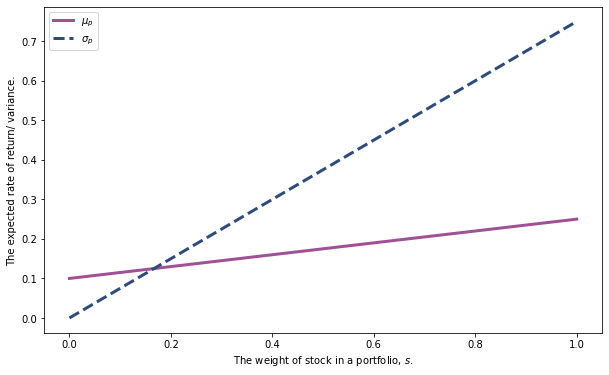

In [33]:
#I now want to demonstrate how varying the weight of risky stock within a portfolio varies combinations between risk and return, (sigma, mu)
#I shall demonstrate that relationship graphically
from pylab import mpl, plt


values = np.linspace(0, 1, 100)

mu = [np.dot(((1-s), s), np.dot(P,R)) for s in values]

sigma = [s*R[:, 1].std() for s in values]
print(sigma)

plt.figure(figsize=(10, 6))
plt.plot(values, mu, color='#a05195', lw=3.0, label='$\mu_p$')
plt.plot(values, sigma,  '--', color='#2f4b7c', lw=3.0, label='$\sigma_p$')
plt.legend(loc=0)
plt.xlabel('The weight of stock in a portfolio, $s$.')
plt.ylabel('The expected rate of return/ variance.');
